### Dependencies

In [1]:
from __future__ import print_function
import torch

## NN Model

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from time import time

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


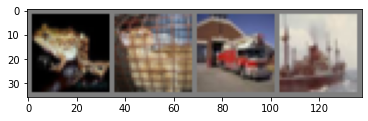

 frog   cat truck  ship


In [4]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [10]:
net = Net()

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [12]:
# to_categorical(labels)

In [13]:
# len(trainloader)

In [14]:
start = time()
for epoch in range(10):  # loop over the dataset multiple times
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0], data[1]

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if (i+1) % 2000 == 0:    # print every 2000 mini-batches
#             print('[%d, %5d] loss: %.3f' %
#                   (epoch + 1, i + 1, running_loss / 2000))
#             t = time() - start
            print(f'EPOCH = {epoch} | STEPS = {i} | LOSS = {running_loss/2000}')
            running_loss = 0.0

end = time()
print(f'Finished Training, Total Training Time = {end - start}')

EPOCH = 0 | STEPS = 1999 | LOSS = 2.2163582263588903
EPOCH = 0 | STEPS = 3999 | LOSS = 1.8452471177875995
EPOCH = 0 | STEPS = 5999 | LOSS = 1.6477097255140543
EPOCH = 0 | STEPS = 7999 | LOSS = 1.558927861943841
EPOCH = 0 | STEPS = 9999 | LOSS = 1.5126968206763267
EPOCH = 0 | STEPS = 11999 | LOSS = 1.4652965202033519
EPOCH = 1 | STEPS = 1999 | LOSS = 1.4059702079817653
EPOCH = 1 | STEPS = 3999 | LOSS = 1.3675475624203681
EPOCH = 1 | STEPS = 5999 | LOSS = 1.3526513762399555
EPOCH = 1 | STEPS = 7999 | LOSS = 1.3309066552892328
EPOCH = 1 | STEPS = 9999 | LOSS = 1.2956189371421933
EPOCH = 1 | STEPS = 11999 | LOSS = 1.2869372886121273
EPOCH = 2 | STEPS = 1999 | LOSS = 1.2081201026290656
EPOCH = 2 | STEPS = 3999 | LOSS = 1.2082947089280933
EPOCH = 2 | STEPS = 5999 | LOSS = 1.2022577876113356
EPOCH = 2 | STEPS = 7999 | LOSS = 1.2043749389722944
EPOCH = 2 | STEPS = 9999 | LOSS = 1.1933695765323937
EPOCH = 2 | STEPS = 11999 | LOSS = 1.1925780646186321
EPOCH = 3 | STEPS = 1999 | LOSS = 1.10657548

In [6]:
net = Net().to(device)

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [8]:
start = time()
for epoch in range(10):  # loop over the dataset multiple times
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if (i+1) % 2000 == 0:    # print every 2000 mini-batches
#             print('[%d, %5d] loss: %.3f' %
#                   (epoch + 1, i + 1, running_loss / 2000))
#             t = time() - start
            print(f'EPOCH = {epoch} | STEPS = {i} | LOSS = {running_loss/2000}')
            running_loss = 0.0

end = time()
print(f'Finished Training, Total Training Time = {end - start}')

EPOCH = 0 | STEPS = 1999 | LOSS = 2.1582510650157927
EPOCH = 0 | STEPS = 3999 | LOSS = 1.8765995776355266
EPOCH = 0 | STEPS = 5999 | LOSS = 1.6702654690742493
EPOCH = 0 | STEPS = 7999 | LOSS = 1.6163916769474744
EPOCH = 0 | STEPS = 9999 | LOSS = 1.555087585389614
EPOCH = 0 | STEPS = 11999 | LOSS = 1.5156339143961668
EPOCH = 1 | STEPS = 1999 | LOSS = 1.4462588835805654
EPOCH = 1 | STEPS = 3999 | LOSS = 1.430341129541397
EPOCH = 1 | STEPS = 5999 | LOSS = 1.37302094976604
EPOCH = 1 | STEPS = 7999 | LOSS = 1.3493015952706338
EPOCH = 1 | STEPS = 9999 | LOSS = 1.323959520637989
EPOCH = 1 | STEPS = 11999 | LOSS = 1.2947755117863418
EPOCH = 2 | STEPS = 1999 | LOSS = 1.2615007535517215
EPOCH = 2 | STEPS = 3999 | LOSS = 1.2587916481643915
EPOCH = 2 | STEPS = 5999 | LOSS = 1.230579916536808
EPOCH = 2 | STEPS = 7999 | LOSS = 1.2151065598130226
EPOCH = 2 | STEPS = 9999 | LOSS = 1.2300925057679415
EPOCH = 2 | STEPS = 11999 | LOSS = 1.1893676850795747
EPOCH = 3 | STEPS = 1999 | LOSS = 1.1253977308422

In [9]:
print(device)

cuda:0


In [ ]:
x.type()

In [ ]:
x = x.type(torch.IntTensor)

In [ ]:
x.type()

In [178]:
x

tensor([[ 0,  0,  1],
        [ 0,  0, -1],
        [ 0,  0, -1]], dtype=torch.int32)

In [166]:
x.dtype

torch.float32